This notebook is written to check the C-grid.

In [9]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import copy,os,glob
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
% matplotlib inline

In [2]:
mesh=nc.Dataset('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/mesh_files/mesh_mask_rm1Canada.nc')

In [3]:
gdept=mesh.variables['gdept'][:]
gdepw=mesh.variables['gdepw'][:]
gdepu=mesh.variables['gdepu'][:]
mbathy=mesh.variables['mbathy'][:]-1
e3t=mesh.variables['e3t'][:]
tmask=mesh.variables['tmask'][:]
e3w=mesh.variables['e3w'][:]
print mbathy.shape
print gdept.shape
print e3t.shape
print tmask.shape

(1, 800, 544)
(1, 50, 800, 544)
(1, 50, 800, 544)
(1, 50, 800, 544)


In [7]:
u_filename=sorted(glob.glob('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/Tochum/EXP00/dyn_off/yearly/*2002*'))
print("found *.nc file: \n{}".format(u_filename))

found *.nc file: 
['/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/Tochum/EXP00/dyn_off/yearly/ANHA4-EXH001_gridT_y2002.nc', '/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/Tochum/EXP00/dyn_off/yearly/ANHA4-EXH001_gridU_y2002.nc', '/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/Tochum/EXP00/dyn_off/yearly/ANHA4-EXH001_gridV_y2002.nc', '/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/Tochum/EXP00/dyn_off/yearly/ANHA4-EXH001_gridW_2002.nc', '/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/Tochum/EXP00/dyn_off/yearly/ANHA4-EXH001_icemod_y2002.nc']


In [ ]:
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/result_jasper/tracer6/newsms/newsol/*ANHA_*_ptrc_T*.nc'))
u_filename=sorted(glob.glob('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/Tochum/EXP00/dyn_off/yearly/*gridU*2002*'))
v_filename=sorted(glob.glob('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/Tochum/EXP00/dyn_off/yearly/*gridV*2002*'))
print("found *.nc file: \n{}".format(u_filename))

ptrc=nc.Dataset(nc_filename[0])
lon=ptrc.variables['nav_lon'][:]
lat=ptrc.variables['nav_lat'][:]
TR_7=ptrc.variables['TR_7'][:,:,:,:];
dep = ptrc.variables['deptht'][:]
u=nc.Dataset(u_filename[0])
U_lon=u.variables['nav_lon'][:]
U_lat=u.variables['nav_lat'][:]
v=nc.Dataset(v_filename[0])
V_lon=v.variables['nav_lon'][:]
V_lat=v.variables['nav_lat'][:]

### Starting point of the whole grid

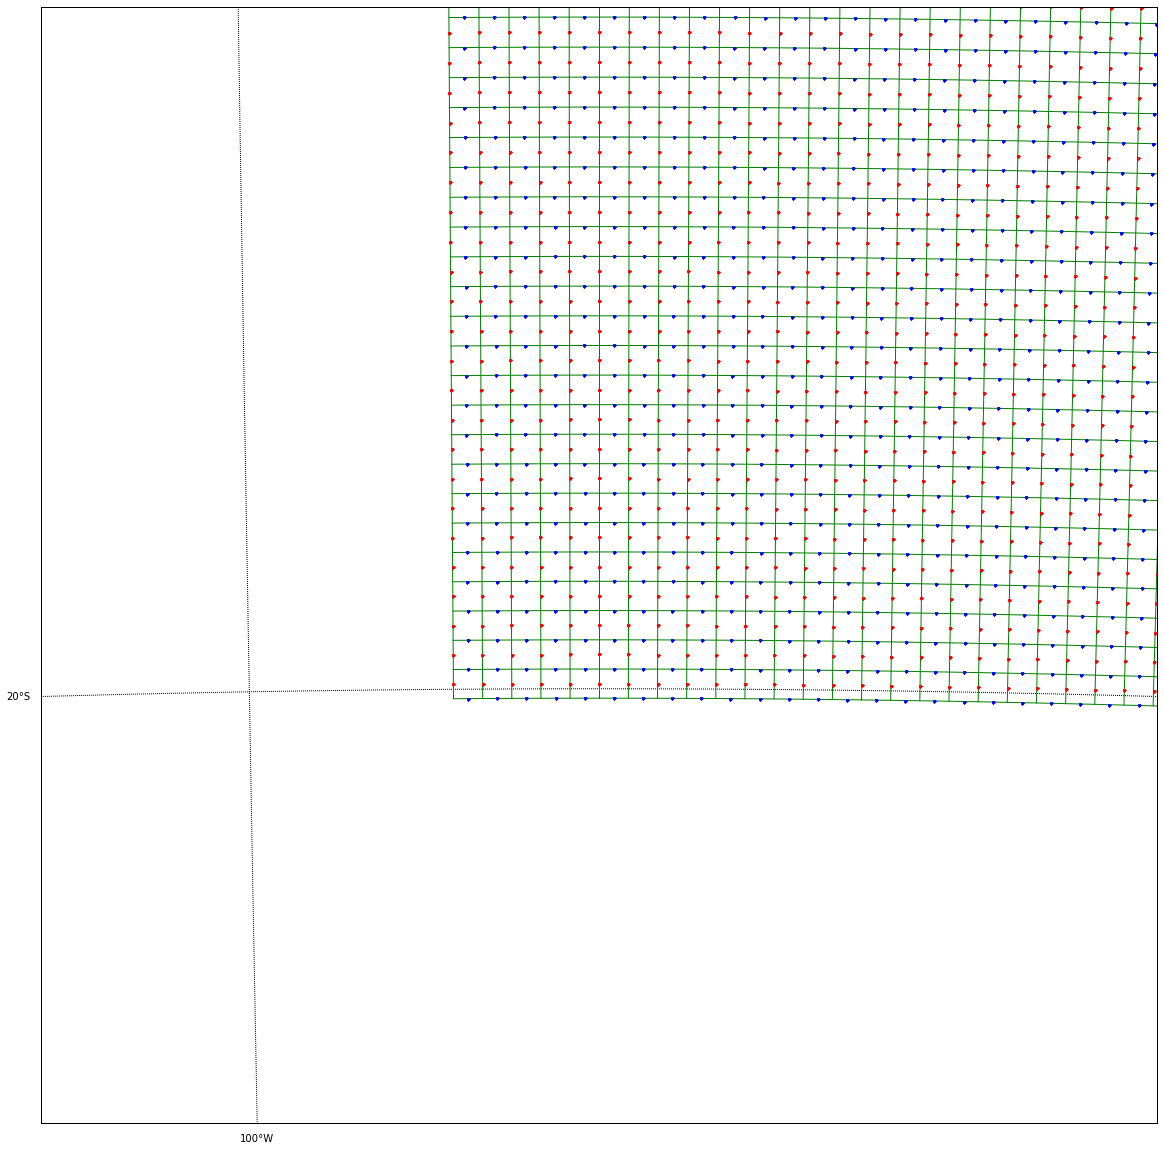

In [96]:
fig = plt.figure(figsize=(20,20))
width =1e6
height =1e6
lon_0=-97
lat_0=-19
projection='stere'
resolution='i'
m = Basemap(width=width,height=height,lon_0=lon_0, lat_0=lat_0,
                projection=projection, resolution=resolution)
m.drawcoastlines()
m.fillcontinents(color = '0.75')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
x_lon,y_lat = m(lon,lat)
plt.plot(x_lon[:300,:],y_lat[:300,:],x_lon[:300,:].T,y_lat[:300,:].T,color='green')
u_lon,u_lat = m(U_lon,U_lat)
plt.plot(u_lon[:300,:],u_lat[:300,:],'.',u_lon[:300,:].T,u_lat[:300,:].T,'.',color='blue')
v_lon,v_lat = m(V_lon,V_lat)
plt.plot(v_lon[:300,:],v_lat[:300,:],'.',v_lon[:300,:].T,v_lat[:300,:].T,'.',color='red')
plt.show()

### Horizontal grid:

```yaml


          v(i,j+1,k)
              |
u(i,j,k)---t(i,j,k)---u(i+1,j,k)
              |
           v(i,j,k)





```

### Check the conclusion

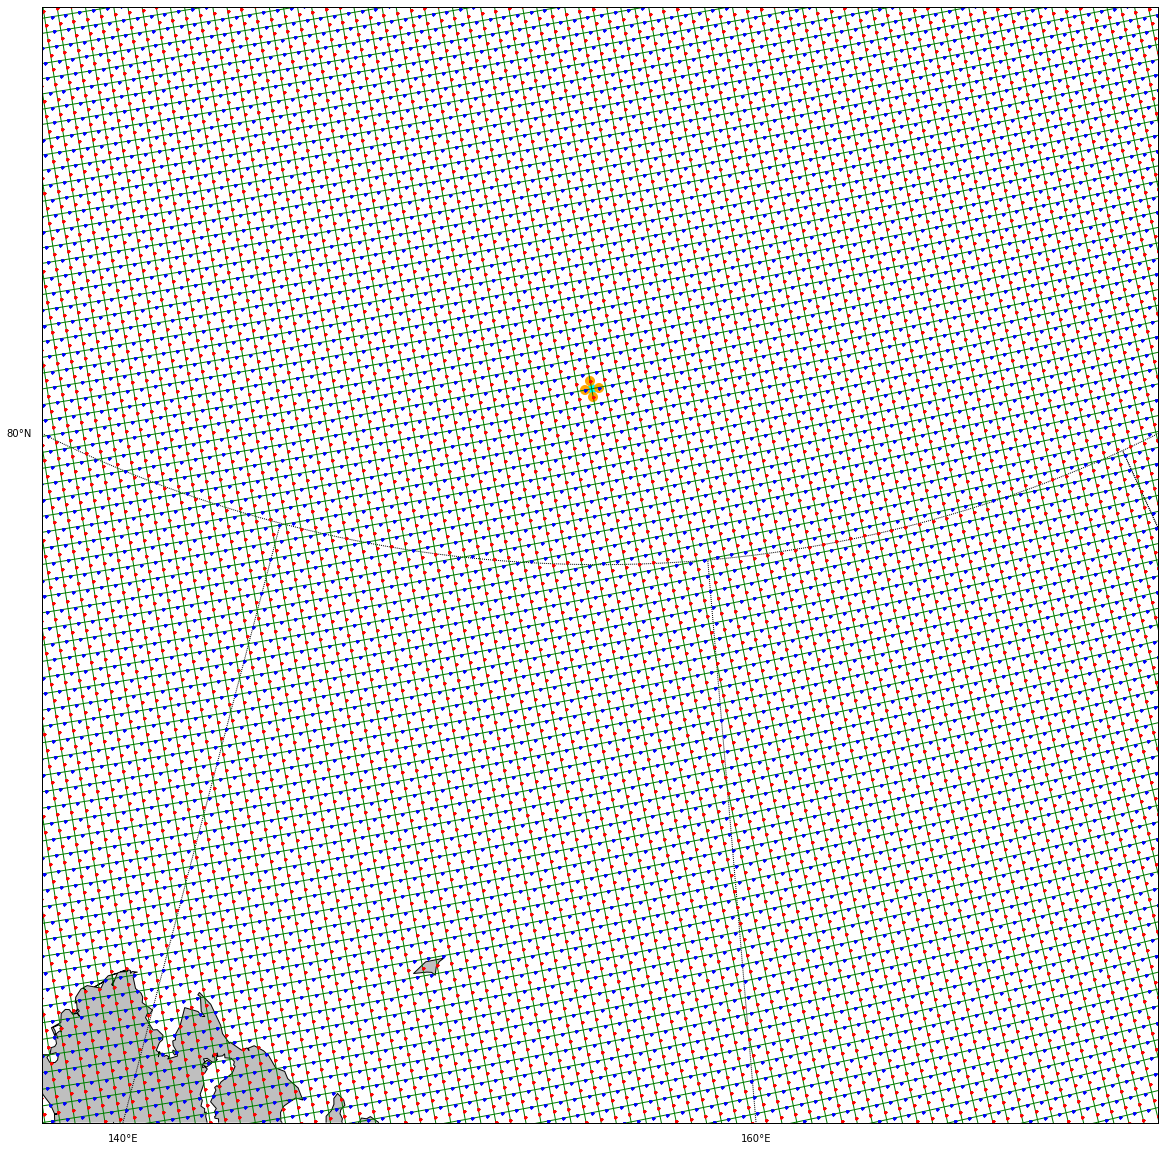

In [81]:
fig = plt.figure(figsize=(20,20))
width =1e6
height =1e6
lon_0=155
lat_0=80
projection='stere'
resolution='i'
m = Basemap(width=width,height=height,lon_0=lon_0, lat_0=lat_0,
                projection=projection, resolution=resolution)
m.drawcoastlines()
m.fillcontinents(color = '0.75')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
x_lon,y_lat = m(lon,lat)
plt.plot(x_lon[600:,:],y_lat[600:,:],x_lon[600:,:].T,y_lat[600:,:].T,color='green')
plt.scatter(x_lon[677,318],y_lat[677,318],color='cyan',s=80)
u_lon,u_lat = m(U_lon,U_lat)
plt.plot(u_lon[600:,:],u_lat[600:,:],'.',u_lon[600:,:].T,u_lat[600:,:].T,'.',color='blue')
plt.scatter(u_lon[677,318],u_lat[677,318],color='orange',s=80)
plt.scatter(u_lon[677,319],u_lat[677,319],color='orange',s=80)


v_lon,v_lat = m(V_lon,V_lat)
plt.plot(v_lon[600:,:],v_lat[600:,:],'.',v_lon[600:,:].T,v_lat[600:,:].T,'.',color='red')
plt.scatter(v_lon[677,318],v_lat[677,318],color='orange',s=80)
plt.scatter(v_lon[678,318],v_lat[678,318],color='orange',s=80)

plt.show()

## Vertical grid:


```yaml
          w(i,j-1,k)
              |
          t(i,j ,k)
              |
          w(i,j ,k)
```

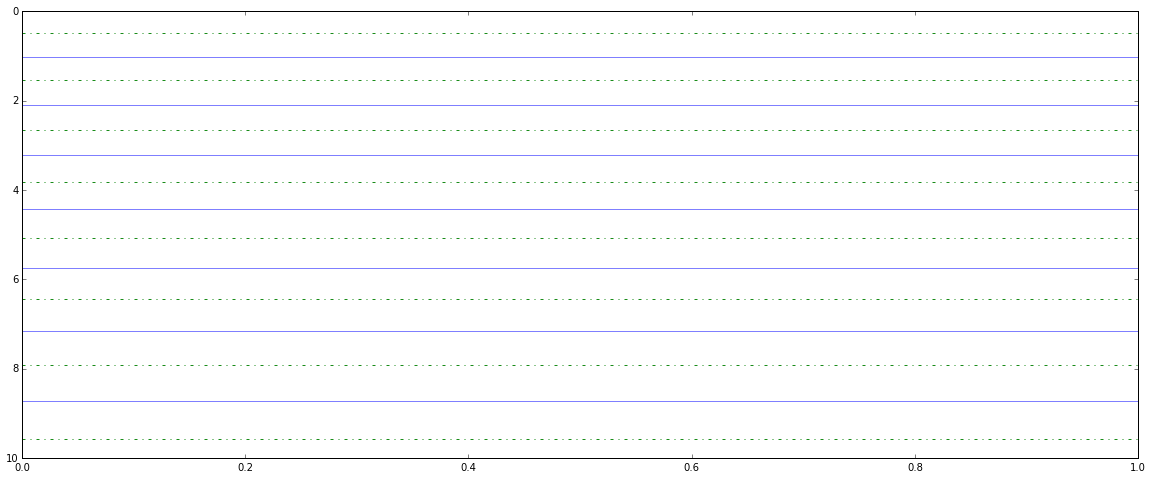

In [91]:
fig = plt.figure(figsize=(20,8))
for k in range (len(gdept[0,:,677,318])):
        plt.axhline(gdept[0,k,677,318],c="green",linestyle='-.',alpha=0.9)
        plt.hold(True)
        plt.axhline(gdepw[0,k,677,318],c="blue",linestyle='-',alpha=0.5)
plt.ylim([0,10])
plt.gca().invert_yaxis() 
plt.show()

In [ ]:
print